<div style="text-align: center; background-color: #44916F; padding: 20px; border-radius: 15px;">
    <span style="color: white; font-size: 50px; font-weight: bold;">Land-Images Classification Project</span>
</div>

<div style="text-align: left; padding: 20px;">
    <span style="color: #9D7C5D; font-size: 25px; font-weight: bold;">Objective
</span>
</div>

The primary objective of this project is to develop an accurate and efficient land image classification system using deep learning techniques. The model aims to categorize land images into different types. This classification helps in automating land use analysis, improving decision-making processes, and supporting various applications in environmental monitoring and urban planning.

<div style="text-align: left; padding: 20px;">
    <span style="color: #9D7C5D; font-size: 25px; font-weight: bold;">Importance
</span>
</div>

 **1. Environmental Monitoring:** Helps track changes in land cover over time, assisting in deforestation detection, climate change studies, and natural disaster assessment.
 
 **2. Urban Planning:** Supports city planners in identifying urban expansion and optimizing land use for infrastructure development.
 
 **3. Agriculture Management:** Assists in crop monitoring, identifying arable land, and optimizing resource allocation for better yield.
 
 **4. Disaster Response:** Provides crucial insights for disaster management teams to assess affected areas and plan recovery efforts effectively.
 
 **5. Automation and Efficiency:** Reduces manual effort and improves accuracy in land classification, making large-scale analysis more feasible and efficient.


By leveraging deep learning models, this project enhances the accuracy of land classification, making it a valuable tool for researchers, policymakers, and organizations working in environmental and urban development sectors.

<div style="text-align: left; padding: 20px;">
    <span style="color: #9D7C5D; font-size: 25px; font-weight: bold;">Target Classes
</span>
</div>


<table style="border-collapse: collapse; width: 100%; border: 1px solid black;">
  <tr style="background-color: #F5F4DC;">
    <th style="border: 1px solid black; padding: 12px; text-align: center; vertical-align: middle;">Class</th>
    <th style="border: 1px solid black; padding: 12px; text-align: center; vertical-align: middle;">Description</th>
  </tr>
  <tr style="background-color: white;">
    <td style="border: 1px solid black; padding: 12px; text-align: center; vertical-align: middle;">Forest</td>
    <td style="border: 1px solid black; padding: 12px; text-align: center; vertical-align: middle;">Areas densely covered with trees, including natural forests and plantations.</td>
  </tr>
  <tr style="background-color: white;">
    <td style="border: 1px solid black; padding: 12px; text-align: center; vertical-align: middle;">Residential</td>
    <td style="border: 1px solid black; padding: 12px; text-align: center; vertical-align: middle;">Urban and suburban areas with housing, buildings, and human settlements.</td>
  </tr>
  <tr style="background-color: white;">
    <td style="border: 1px solid black; padding: 12px; text-align: center; vertical-align: middle;">Herbaceous Vegetation</td>
    <td style="border: 1px solid black; padding: 12px; text-align: center; vertical-align: middle;">Regions covered with grass, shrubs, and other non-woody plants.</td>
  </tr>
  <tr style="background-color: white;">
    <td style="border: 1px solid black; padding: 12px; text-align: center; vertical-align: middle;">Sea/Lake</td>
    <td style="border: 1px solid black; padding: 12px; text-align: center; vertical-align: middle;">Large bodies of water, including oceans, seas, and lakes.</td>
  </tr>
  <tr style="background-color: white;">
    <td style="border: 1px solid black; padding: 12px; text-align: center; vertical-align: middle;">Annual Crop</td>
    <td style="border: 1px solid black; padding: 12px; text-align: center; vertical-align: middle;">Farmlands where crops are planted and harvested within a single year.</td>
  </tr>
  <tr style="background-color: white;">
    <td style="border: 1px solid black; padding: 12px; text-align: center; vertical-align: middle;">Industrial</td>
    <td style="border: 1px solid black; padding: 12px; text-align: center; vertical-align: middle;">Areas with factories, warehouses, and manufacturing facilities.</td>
  </tr>
  <tr style="background-color: white;">
    <td style="border: 1px solid black; padding: 12px; text-align: center; vertical-align: middle;">River</td>
    <td style="border: 1px solid black; padding: 12px; text-align: center; vertical-align: middle;">Flowing bodies of water such as rivers and streams.</td>
  </tr>
  <tr style="background-color: white;">
    <td style="border: 1px solid black; padding: 12px; text-align: center; vertical-align: middle;">Highway</td>
    <td style="border: 1px solid black; padding: 12px; text-align: center; vertical-align: middle;">Major roads, highways, and transportation routes.</td>
  </tr>
  <tr style="background-color: white;">
    <td style="border: 1px solid black; padding: 12px; text-align: center; vertical-align: middle;">Permanent Crop</td>
    <td style="border: 1px solid black; padding: 12px; text-align: center; vertical-align: middle;">Agricultural lands with crops that grow continuously, such as vineyards or orchards.</td>
  </tr>
  <tr style="background-color: white;">
    <td style="border: 1px solid black; padding: 12px; text-align: center; vertical-align: middle;">Pasture</td>
    <td style="border: 1px solid black; padding: 12px; text-align: center; vertical-align: middle;">Land used for grazing livestock, covered with grass or other forage plants.</td>
  </tr>
</table>

<td style="border: 1px solid white; padding: 12px;">&nbsp;</td>

<div style="text-align: center; background-color: #B2D9C4; padding: 10px; border-radius: 15px;">
    <span style="color: white; font-size: 35px; font-weight: bold;">Libraries & Loading Data</span>
</div>

In [1]:
#Important libraries
import cv2
import shutil
import zipfile
import hashlib
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from google.colab import drive
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import AdamW
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import EfficientNetB3
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.losses import CategoricalFocalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D, LeakyReLU, AveragePooling2D
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/eurosat-rgb/EuroSAT_RGB/SeaLake/SeaLake_2025.jpg
/kaggle/input/eurosat-rgb/EuroSAT_RGB/SeaLake/SeaLake_1571.jpg
/kaggle/input/eurosat-rgb/EuroSAT_RGB/SeaLake/SeaLake_227.jpg
/kaggle/input/eurosat-rgb/EuroSAT_RGB/SeaLake/SeaLake_926.jpg
/kaggle/input/eurosat-rgb/EuroSAT_RGB/SeaLake/SeaLake_907.jpg
/kaggle/input/eurosat-rgb/EuroSAT_RGB/SeaLake/SeaLake_528.jpg
/kaggle/input/eurosat-rgb/EuroSAT_RGB/SeaLake/SeaLake_844.jpg
/kaggle/input/eurosat-rgb/EuroSAT_RGB/SeaLake/SeaLake_830.jpg
/kaggle/input/eurosat-rgb/EuroSAT_RGB/SeaLake/SeaLake_2215.jpg
/kaggle/input/eurosat-rgb/EuroSAT_RGB/SeaLake/SeaLake_1203.jpg
/kaggle/input/eurosat-rgb/EuroSAT_RGB/SeaLake/SeaLake_1756.jpg
/kaggle/input/eurosat-rgb/EuroSAT_RGB/SeaLake/SeaLake_299.jpg
/kaggle/input/eurosat-rgb/EuroSAT_RGB/SeaLake/SeaLake_502.jpg
/kaggle/input/eurosat-rgb/EuroSAT_RGB/SeaLake/SeaLake_875.jpg
/kaggle/input/eurosat-rgb/EuroSAT_RGB/SeaLake/SeaLake_755.jpg
/kaggle/input/eurosat-rgb/EuroSAT_RGB/SeaLake/SeaLake_2200.jpg
/k

In [3]:
palette = ['#0077B6', '#00B4D8', '#44916F', '#B2D9C4', '#C8AC7E', '#9D7C5D']

In [4]:
dataset = "/kaggle/input/eurosat-rgb/EuroSAT_RGB"

<td style="border: 1px solid white; padding: 12px;">&nbsp;</td>

<div style="text-align: center; background-color: #B2D9C4; padding: 10px; border-radius: 15px;">
    <span style="color: white; font-size: 35px; font-weight: bold;">Exploratory Data Analysis</span>
</div>

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


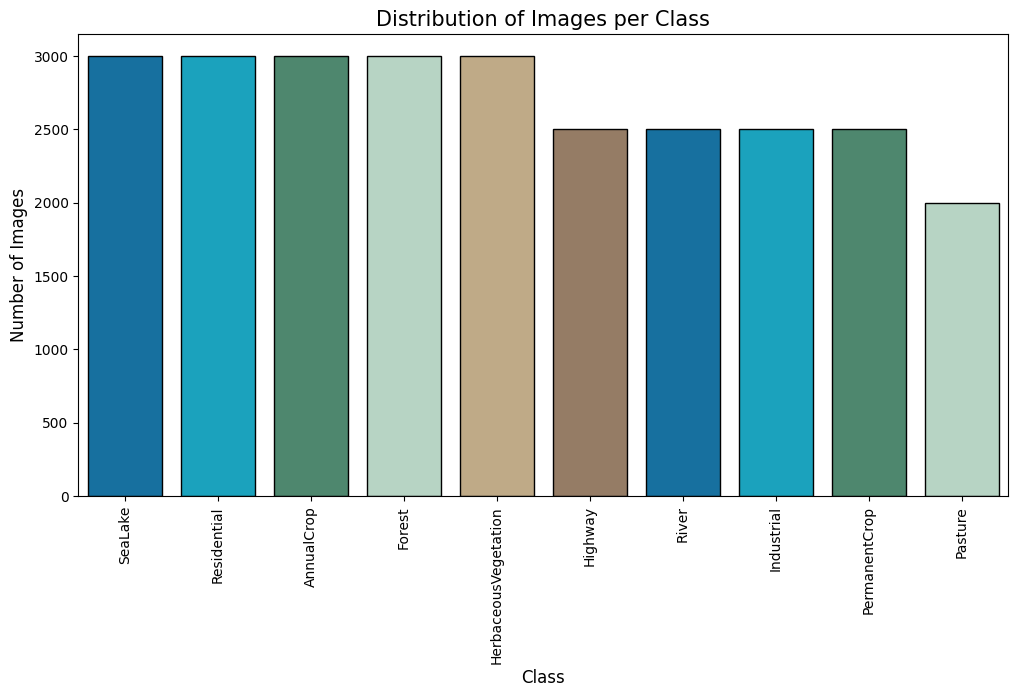

In [5]:
#Count images in each class
classes = os.listdir(dataset)
class_counts = {cls: len(os.listdir(os.path.join(dataset, cls))) for cls in classes}

sorted_classes = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)

sorted_class_names = [cls[0] for cls in sorted_classes]
sorted_class_counts = [cls[1] for cls in sorted_classes]

plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_class_names, y=sorted_class_counts, palette=palette, edgecolor='black')

plt.xticks(rotation=90)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Distribution of Images per Class', fontsize=15)
plt.show()

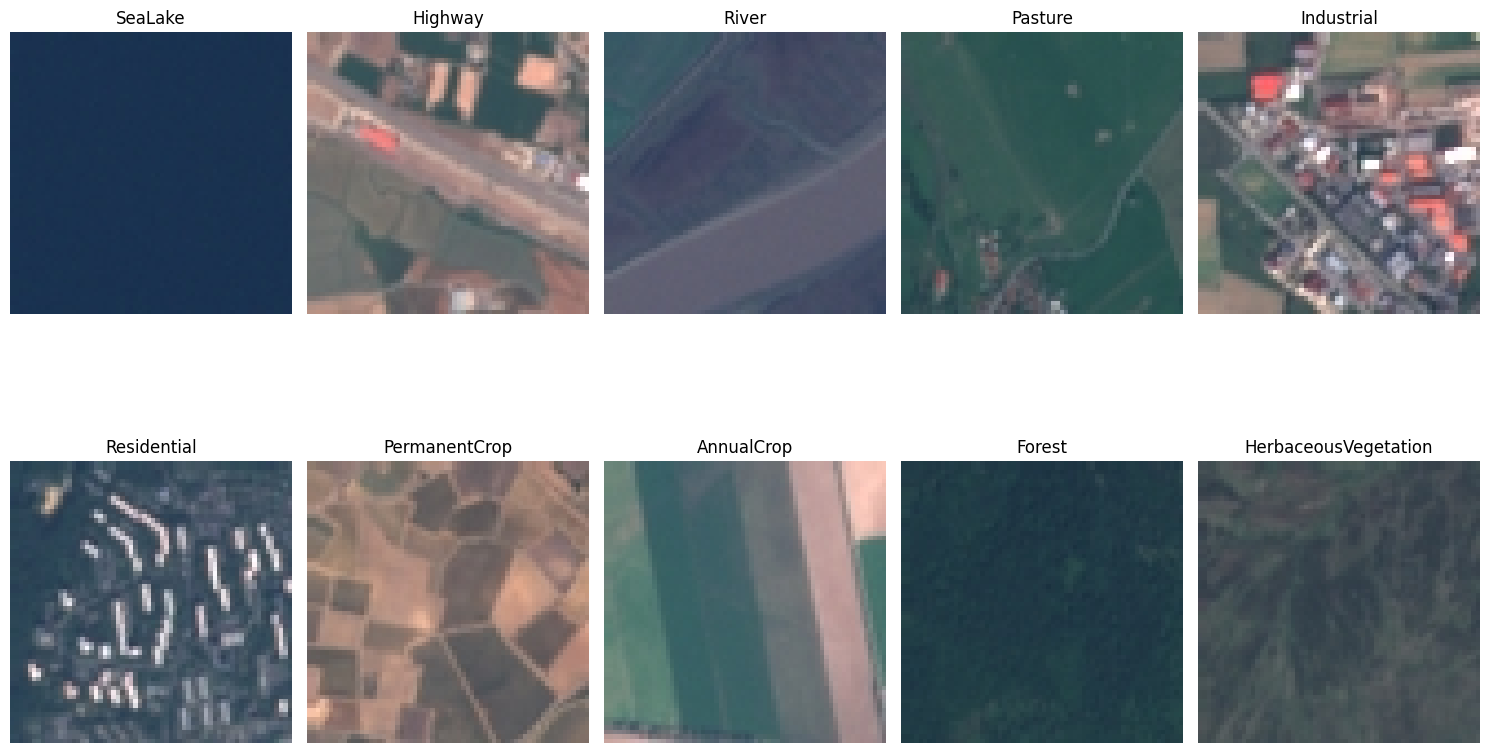

In [6]:
#Display sample image from each class
plt.figure(figsize=(15, 10))
num_images = 10

for i, cls in enumerate(classes[:num_images]):
    class_path = os.path.join(dataset, cls)

    #Choose random image
    name = np.random.choice(os.listdir(class_path))
    path = os.path.join(class_path, name)
    img = load_img(path)

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [7]:
#Check images sizes
img_shapes = []

for cls in classes:
    class_path = os.path.join(dataset, cls)
    name = np.random.choice(os.listdir(class_path))
    path = os.path.join(class_path, name)

    img = cv2.imread(path)
    img_shapes.append(img.shape[:2])

img_shapes[:10]

[(64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64),
 (64, 64)]

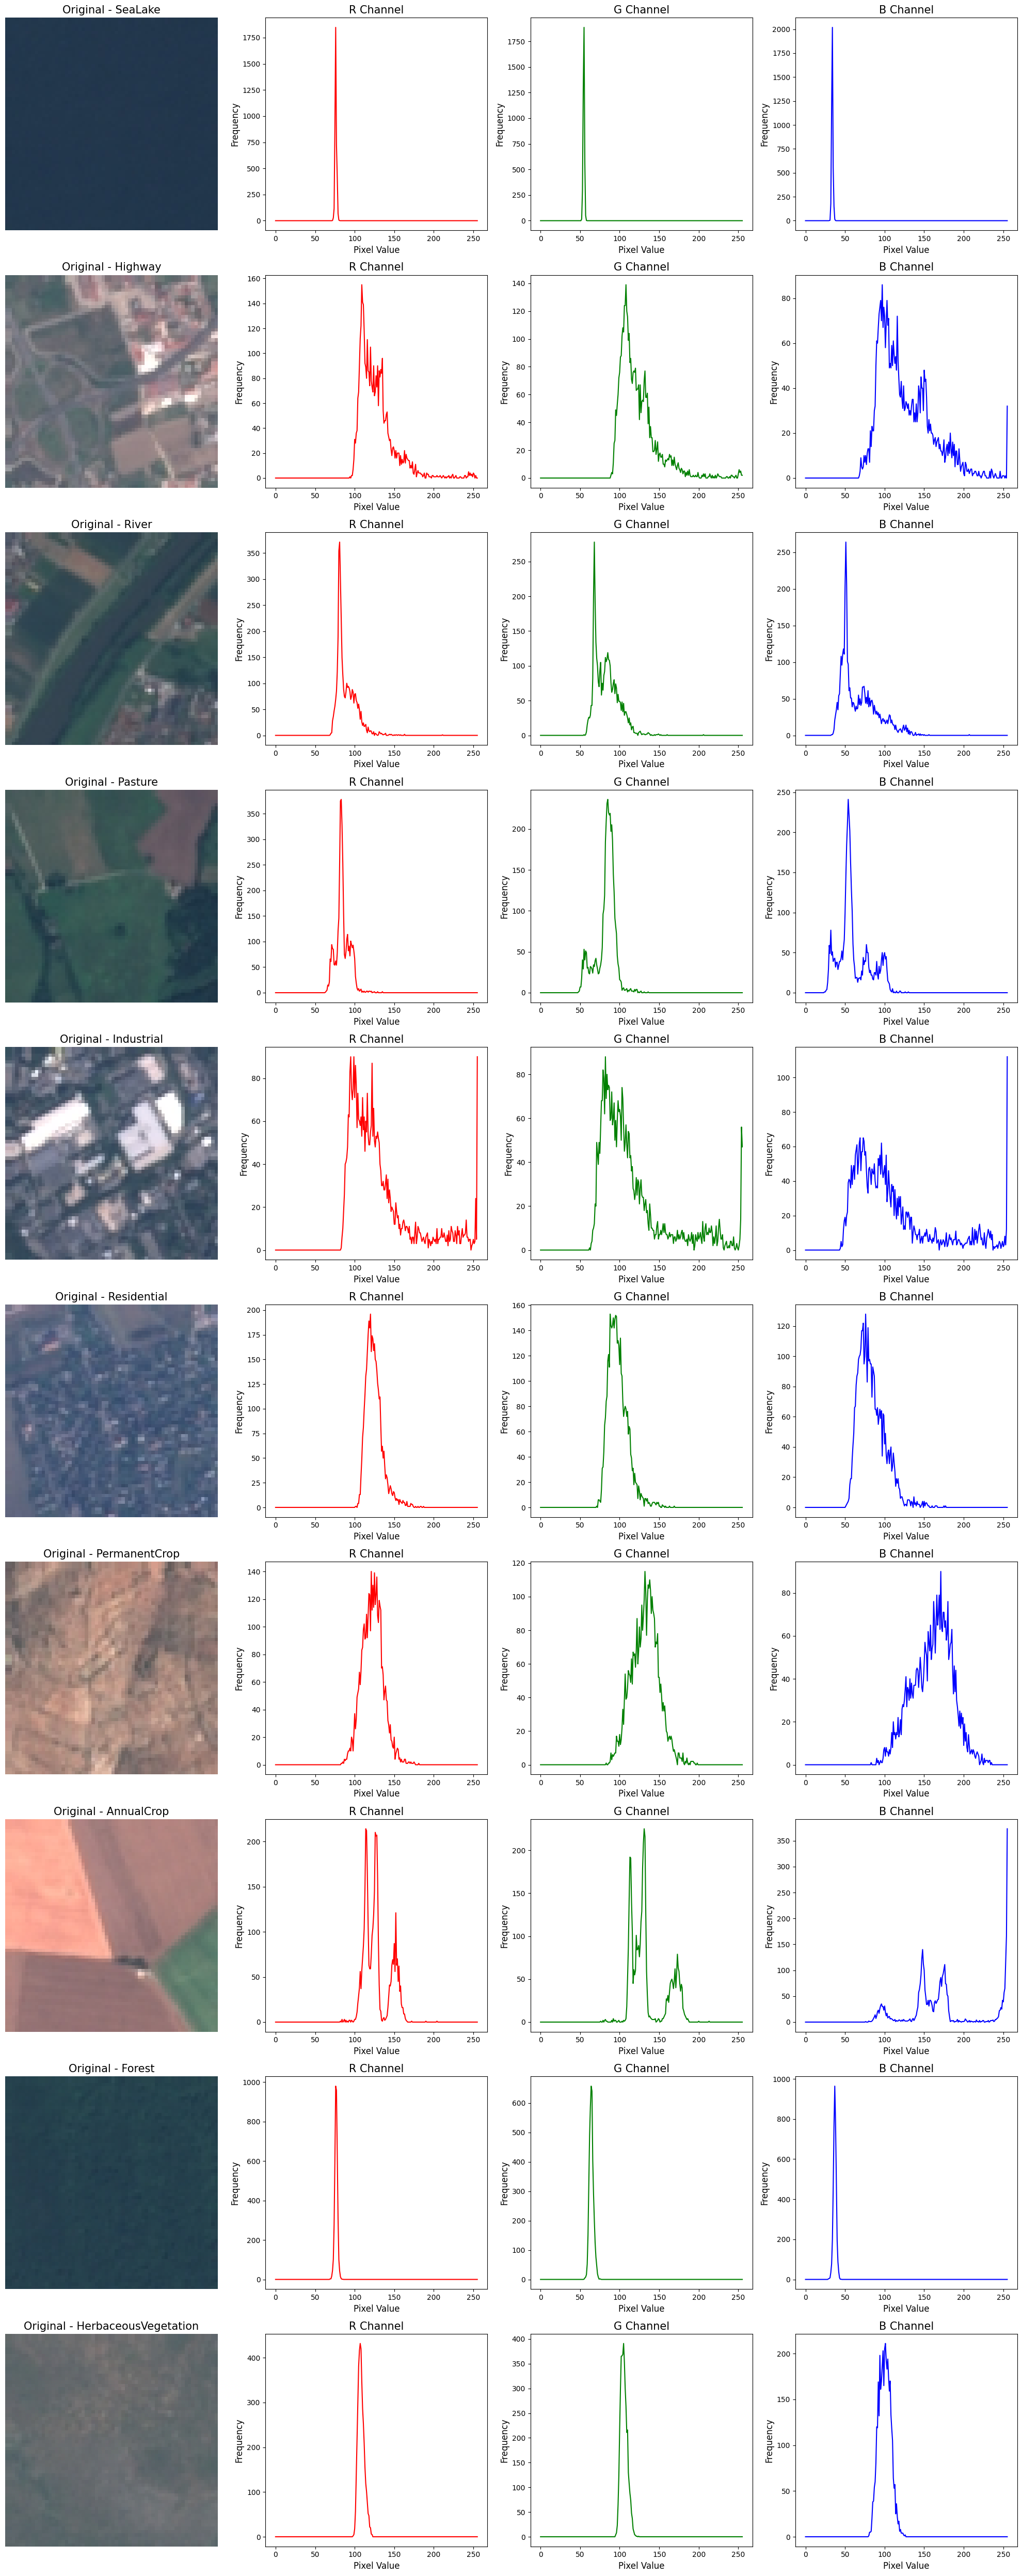

In [8]:
#Check RGB distributions for a sample image from each class
plt.figure(figsize=(20, 50))

colors = ('r', 'g', 'b')

for row, cls in enumerate(classes[:10]):
    class_path = os.path.join(dataset, cls)

    #Choose random image
    image_name = np.random.choice(os.listdir(class_path))
    image_path = os.path.join(class_path, image_name)

    img = cv2.imread(image_path)

    #Original image
    plt.subplot(10, 4, row * 4 + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'Original - {cls}', fontsize=15)
    plt.axis('off')

    #Colors channels distributions
    for i, color in enumerate(colors):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.subplot(10, 4, row * 4 + i + 2)
        plt.plot(hist, color=color)
        plt.title(f'{color.upper()} Channel', fontsize=15)
        plt.xlabel('Pixel Value', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


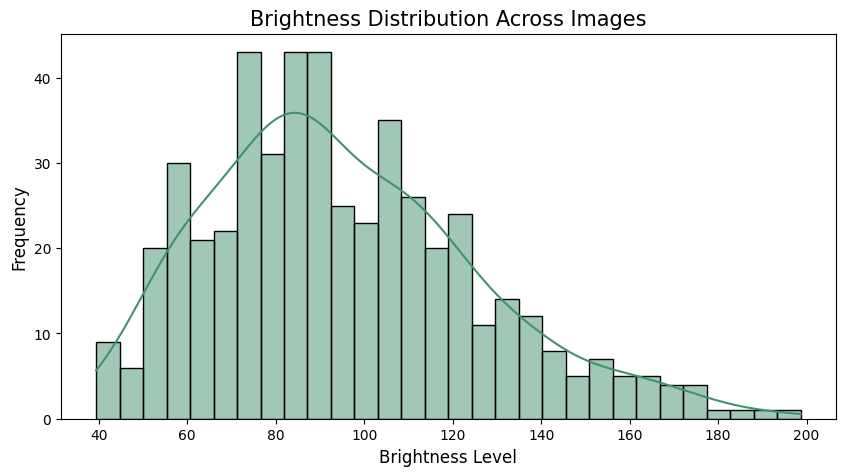

In [9]:
#Check contrast and brightness
brightness_values = []

for cls in classes:
    class_path = os.path.join(dataset, cls)

    #First 50 image in each class
    for image_name in os.listdir(class_path)[:50]:
        image_path = os.path.join(class_path, image_name)

        #Convert to grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        mean_brightness = img.mean()
        brightness_values.append(mean_brightness)

plt.figure(figsize=(10, 5))
sns.histplot(brightness_values, bins=30, kde=True, color='#44916F')
plt.xlabel('Brightness Level', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Brightness Distribution Across Images', fontsize=15)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


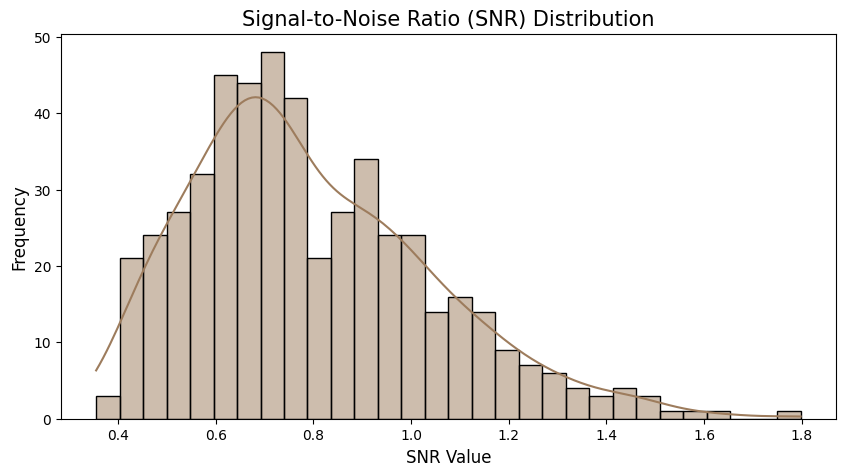

In [10]:
#Check noise
def compute_snr(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    mean_signal = np.mean(img)
    noise = img - cv2.GaussianBlur(img, (5, 5), 0)
    std_noise = np.std(noise)
    snr = mean_signal / (std_noise + 1e-8)
    return snr

snr_values = []
for cls in classes:
    class_path = os.path.join(dataset, cls)

    #First 50 image in each class
    for image_name in os.listdir(class_path)[:50]:
        image_path = os.path.join(class_path, image_name)
        snr_values.append(compute_snr(image_path))

plt.figure(figsize=(10, 5))
sns.histplot(snr_values, bins=30, kde=True, color='#9D7C5D')
plt.xlabel('SNR Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Signal-to-Noise Ratio (SNR) Distribution', fontsize=15)
plt.show()

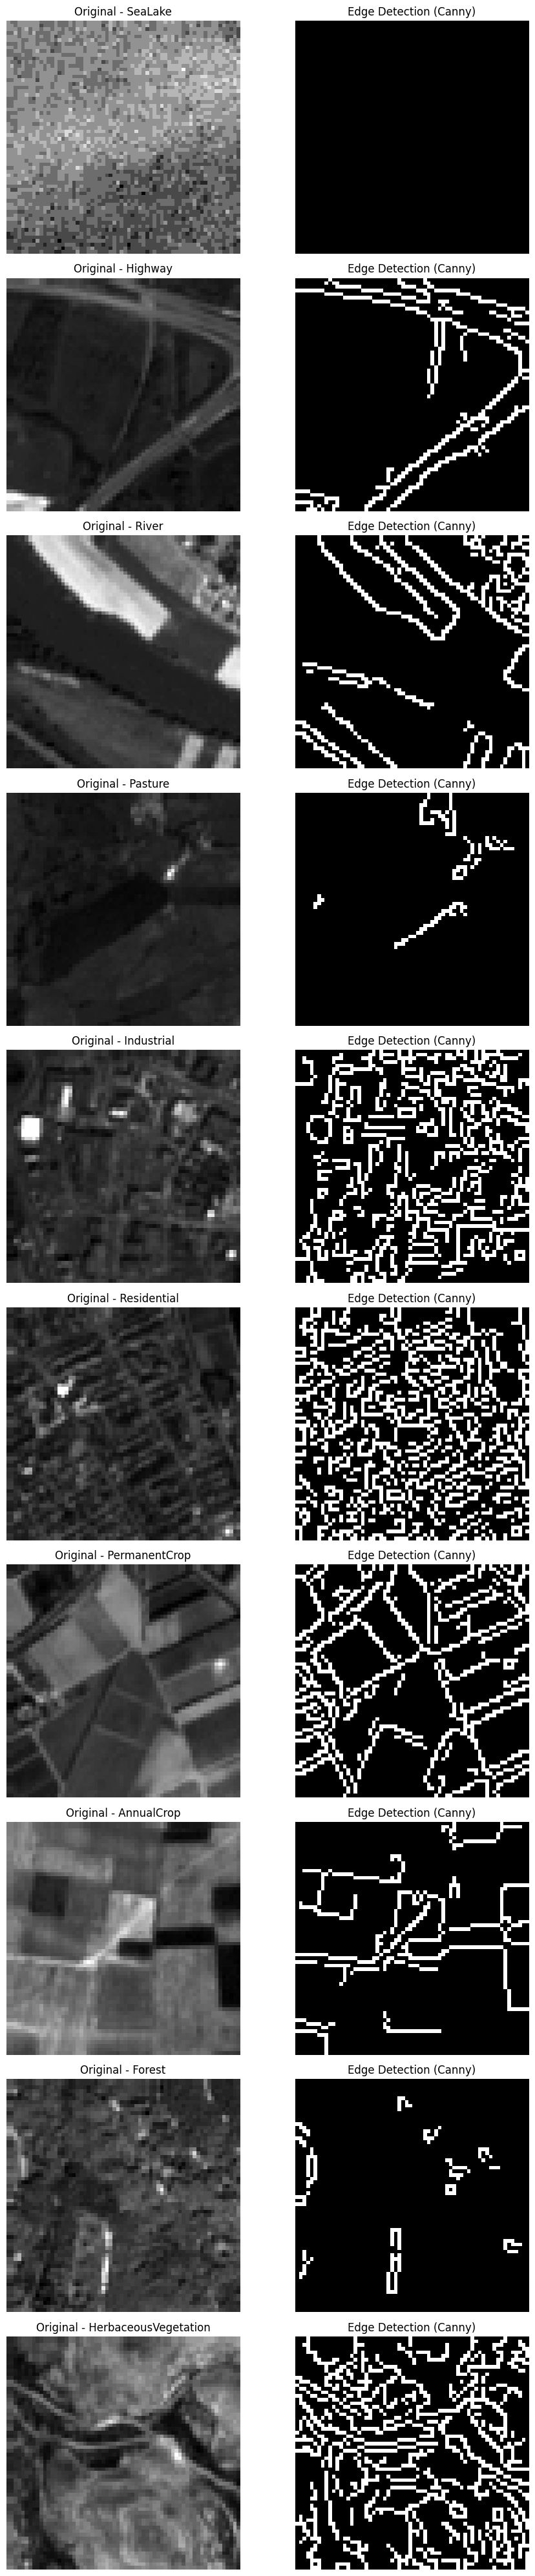

In [11]:
#Detect edges of a sample image from each class
plt.figure(figsize=(10, 40))

for row, cls in enumerate(classes[:10]):
    class_path = os.path.join(dataset, cls)

    #Choose random image
    image_name = np.random.choice(os.listdir(class_path))
    image_path = os.path.join(class_path, image_name)

    #Convert to grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(img, 50, 100)

    #Original image
    plt.subplot(10, 2, row * 2 + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Original - {cls}', fontsize=12)
    plt.axis('off')

    #Edges image
    plt.subplot(10, 2, row * 2 + 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Detection (Canny)', fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [12]:
#Check corrupt images
corrupt_images = []

for cls in classes:
  class_path = os.path.join(dataset, cls)

  for img_name in os.listdir(class_path):
    img_path = os.path.join(class_path, img_name)

    try:
      img = cv2.imread(img_path)

      if img is None:
        corrupt_images.append(img_path)

    except:
      corrupt_images.append(img_path)

print(f'Number of corrupt images: {len(corrupt_images)}')

Number of corrupt images: 0


In [13]:
#Check duplicated images
image_hashes = set()
duplicate_images = []

for cls in classes:
  class_path = os.path.join(dataset, cls)

  for image_name in os.listdir(class_path):
    image_path = os.path.join(class_path, image_name)

    with open(image_path, 'rb') as f:
      img_hash = hashlib.md5(f.read()).hexdigest()

    if img_hash in image_hashes:
      duplicate_images.append(image_path)

    else:
      image_hashes.add(img_hash)

print(f'Number of duplicated images: {len(duplicate_images)}')

Number of duplicated images: 0


<td style="border: 1px solid white; padding: 12px;">&nbsp;</td>

<div style="text-align: center; background-color: #B2D9C4; padding: 10px; border-radius: 15px;">
    <span style="color: white; font-size: 35px; font-weight: bold;">Preprocessing</span>
</div>

In [35]:
#Defining directories
base_dir = "split_data"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

#Creating directories if they don't exist
for dir_path in [train_dir, val_dir, test_dir]:
    os.makedirs(dir_path, exist_ok=True)

#Splitting data
for class_name in os.listdir(dataset):
    class_path = os.path.join(dataset, class_name)
    
    if not os.path.isdir(class_path):  
        continue
    
    images = os.listdir(class_path)
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42, stratify=None)
    train_images, val_images = train_test_split(train_images, test_size=0.125, random_state=42, stratify=None)

    #Copying images to the folders
    for split, image_list in zip(["train", "val", "test"], [train_images, val_images, test_images]):
        split_class_dir = os.path.join(base_dir, split, class_name)
        os.makedirs(split_class_dir, exist_ok=True)
        
        for image in image_list:
            src = os.path.join(class_path, image)
            dst = os.path.join(split_class_dir, image)
            shutil.copy(src, dst)  

#Creating ImageDataGenerators for data augmentation & preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
val_test_datagen = ImageDataGenerator(rescale=1./255)

#Loading train data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

#Loading validation data
val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False 
)

#Loading test data
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False 
)

#Print sizes of training, validation, & test
print(f'Training samples: {train_generator.samples}')
print(f'Validation samples: {val_generator.samples}')
print(f'Test samples: {test_generator.samples}')

Found 18900 images belonging to 10 classes.
Found 2700 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.
Training samples: 18900
Validation samples: 2700
Test samples: 5400


<td style="border: 1px solid white; padding: 12px;">&nbsp;</td>

<div style="text-align: center; background-color: #B2D9C4; padding: 10px; border-radius: 15px;">
    <span style="color: white; font-size: 35px; font-weight: bold;">Evaluation Functions</span>
</div>

In [36]:
#Accuracy & loss curves function
def plot_training_curves(history):
    plt.figure(figsize=(10, 4))

    #Accuracy curve
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='#44916F', linewidth=1.5)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='#DAA06D', linewidth=1.5)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy Curve')
    plt.grid(True)

    #Loss curve
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', color='#44916F', linewidth=1.5)
    plt.plot(history.history['val_loss'], label='Validation Loss', color='#DAA06D', linewidth=1.5)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Curve')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [37]:
#Evaluation metrics function
def evaluate_model(model, test_generator):
    y_pred_prob = model.predict(test_generator)
    y_pred_classes = np.argmax(y_pred_prob, axis=1)
    y_true = test_generator.classes 

    #Accuracy, loss
    test_loss, test_acc = model.evaluate(test_generator, verbose=1)

    print(f'Test Accuracy: {test_acc:.4f}')
    print(f'Test Loss: {test_loss:.4f}')

    #Precision, Recall, F1-score
    precision = precision_score(y_true, y_pred_classes, average='weighted')
    recall = recall_score(y_true, y_pred_classes, average='weighted')
    f1 = f1_score(y_true, y_pred_classes, average='weighted')

    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')

    #Classification report
    print('\nClassification Report:')
    print(classification_report(y_true, y_pred_classes, digits=4))

    #Confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)  
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    #Normalized Confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes, normalize='true')  
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Normalized Confusion Matrix')
    plt.show()

<td style="border: 1px solid white; padding: 12px;">&nbsp;</td>

<div style="text-align: center; background-color: #B2D9C4; padding: 10px; border-radius: 15px;">
    <span style="color: white; font-size: 35px; font-weight: bold;">Model Development</span>
</div>

<div style="text-align: left; padding: 20px;">
    <span style="color: #9D7C5D; font-size: 25px; font-weight: bold;">Model 1
</span>
</div>


In [38]:
#CNN model 

#Model architecture
model = Sequential([

    #Convolutional & pooling Layer 1
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(pool_size=(2,2)),

    #Convolutional & pooling Layer 2
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    #Convolutional & pooling Layer 3
    Conv2D(128, (3,3), activation='relu'),

    #Flatten layer
    Flatten(),

    #Fully Connected Layer
    Dense(128, activation='relu'),

    #Output Layer
    Dense(10, activation='softmax')
])

#Model compilation
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Model training
history = model.fit(
    train_generator,
    epochs=20,
    batch_size=32,
    validation_data=val_generator
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


591/591 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.4028 - loss: 1.5496 - val_accuracy: 0.6370 - val_loss: 0.9410
Epoch 2/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.6956 - loss: 0.8357 - val_accuracy: 0.7615 - val_loss: 0.6791
Epoch 3/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7613 - loss: 0.6549 - val_accuracy: 0.7848 - val_loss: 0.6002
Epoch 4/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7918 - loss: 0.5723 - val_accuracy: 0.7970 - val_loss: 0.5648
Epoch 5/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8372 - loss: 0.4633 - val_accuracy: 0.7981 - val_loss: 0.5579
Epoch 6/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8555 - loss: 0.4058 - val_accuracy: 0.8170 - val_loss: 0.5054
Epoch 7/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8767 - loss: 0.3506 - val_accuracy: 0.8322 - val_loss: 0.4788
Epoch 8/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9082 - loss: 0.2650 - val_accuracy: 0.83

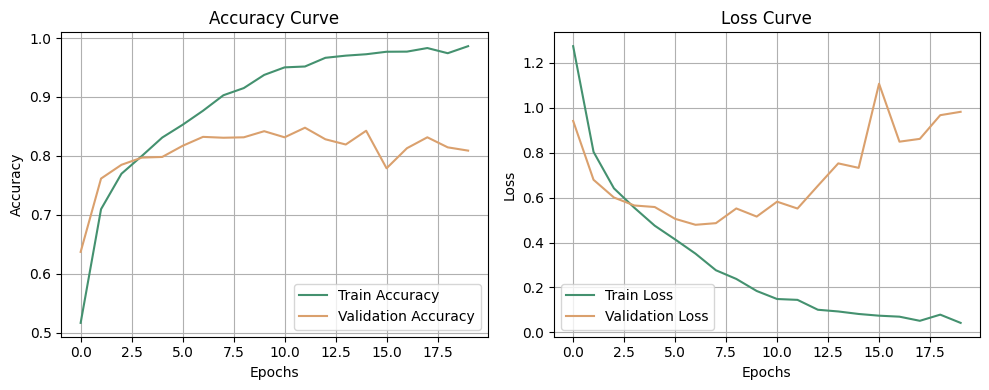

In [39]:
plot_training_curves(history)

169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8151 - loss: 0.9910
Test Accuracy: 0.8172
Test Loss: 0.9674
Precision: 0.8184
Recall: 0.8172
F1-score: 0.8145

Classification Report:
              precision    recall  f1-score   support

           0     0.8447    0.8433    0.8440       600
           1     0.9632    0.9167    0.9394       600
           2     0.6812    0.8050    0.7380       600
           3     0.6975    0.4980    0.5811       500
           4     0.8845    0.9040    0.8942       500
           5     0.8559    0.7575    0.8037       400
           6     0.7018    0.6260    0.6617       500
           7     0.9026    0.9417    0.9217       600
           8     0.6711    0.8080    0.7332       500
           9     0.9408    0.9800    0.9600       600

    accuracy                         0.8172      5400
   macro avg     0.8143    0.8080    0.8077      5400
weighted avg     0.8184    0.8172    0.8145      5400



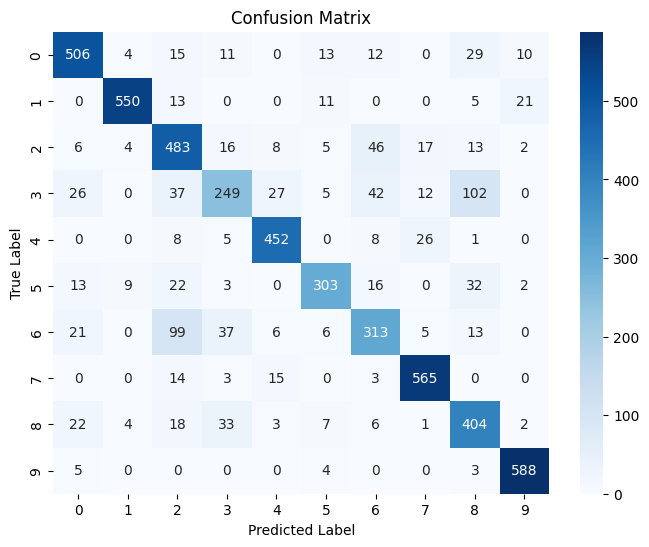

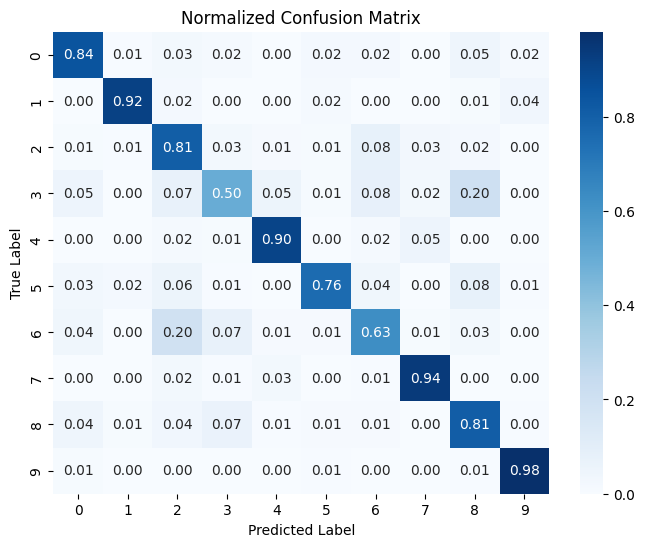

In [40]:
evaluate_model(model, test_generator)

<td style="border: 1px solid white; padding: 12px;">&nbsp;</td>

<div style="text-align: left; padding: 20px;">
    <span style="color: #9D7C5D; font-size: 25px; font-weight: bold;">Model 2
</span>
</div>

In [44]:
#CNN model with modification to prevent overfitting & improve performance

#Model architecture
model = Sequential([

    #Convolutional & pooling Layer 1
    Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(64,64,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    #Convolutional & pooling Layer 2
    Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    #Convolutional & pooling Layer 3
    Conv2D(128, (3,3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    #Global Average Pooling layer instead of flatten
    GlobalAveragePooling2D(),

    #Fully Connected Layer
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),  

    #Output Layer
    Dense(10, activation='softmax')
])


#Model compilation
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


#Callbacks to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)


#Model training
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


591/591 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.6078 - loss: 1.4161 - val_accuracy: 0.4778 - val_loss: 1.7297 - learning_rate: 3.0000e-04
Epoch 2/50
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7866 - loss: 0.8529 - val_accuracy: 0.4600 - val_loss: 2.2989 - learning_rate: 3.0000e-04
Epoch 3/50
591/591 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8196 - loss: 0.7379 - val_accuracy: 0.8767 - val_loss: 0.5729 - learning_rate: 3.0000e-04
Epoch 4/50
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8665 - loss: 0.6063 - val_accuracy: 0.8789 - val_loss: 0.5735 - learning_rate: 3.0000e-04
Epoch 5/50
591/591 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8719 - loss: 0.5695 - val_accuracy: 0.8356 - val_loss: 0.6539 - learning_rate: 3.0000e-04
Epoch 6/50
591/591 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8947 - loss: 0.4989 - val_accuracy: 0.8037 - val_loss: 0.7513 - learning_rate: 3.0000e-04
Epoch 7/50
591/591 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9

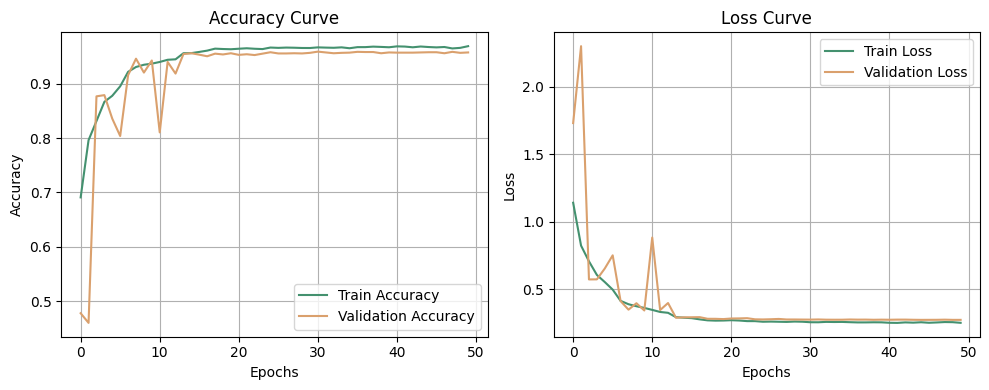

In [45]:
plot_training_curves(history)

169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9528 - loss: 0.3017
Test Accuracy: 0.9552
Test Loss: 0.2873
Precision: 0.9552
Recall: 0.9552
F1-score: 0.9551

Classification Report:
              precision    recall  f1-score   support

           0     0.9451    0.9467    0.9459       600
           1     0.9802    0.9917    0.9859       600
           2     0.9356    0.9200    0.9277       600
           3     0.9430    0.9260    0.9344       500
           4     0.9622    0.9660    0.9641       500
           5     0.9367    0.9625    0.9494       400
           6     0.9066    0.9320    0.9191       500
           7     0.9884    0.9917    0.9900       600
           8     0.9563    0.9180    0.9367       500
           9     0.9834    0.9867    0.9850       600

    accuracy                         0.9552      5400
   macro avg     0.9537    0.9541    0.9538      5400
weighted avg     0.9552    0.9552    0.9551      5400



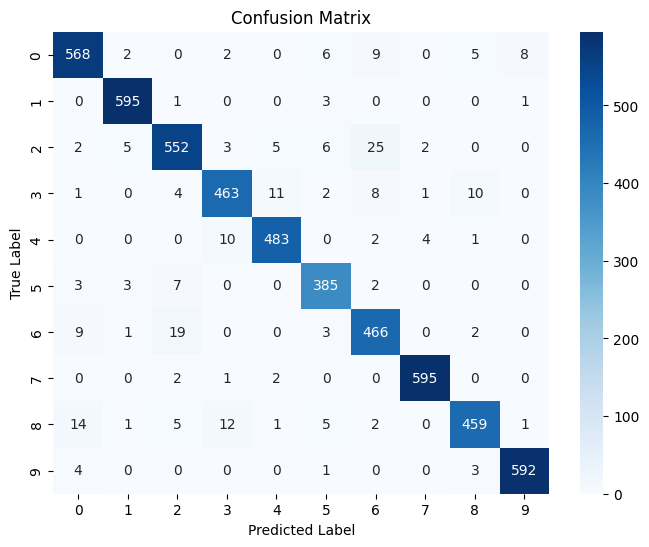

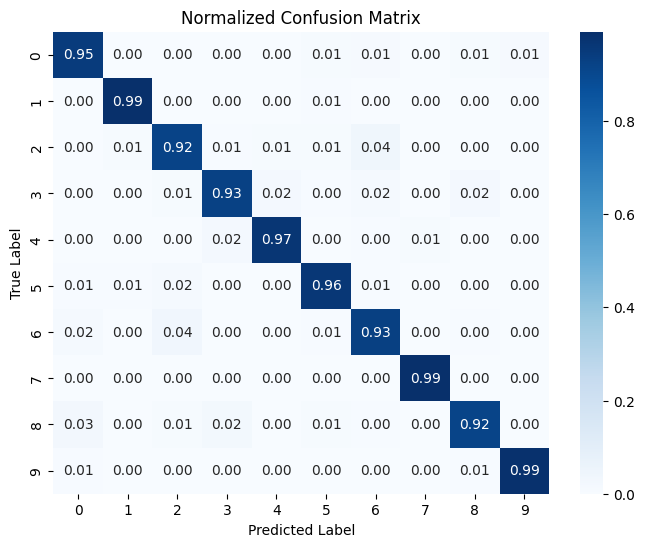

In [46]:
evaluate_model(model, test_generator)

<td style="border: 1px solid white; padding: 12px;">&nbsp;</td>

<div style="text-align: left; padding: 20px;">
    <span style="color: #9D7C5D; font-size: 25px; font-weight: bold;">Model 3
</span>
</div>

In [41]:
#CNN model with modification to prevent overfitting & improve performance

#Model architecture
model = Sequential([

    #Convolutional & pooling Layer 1
    Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(64,64,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    #Convolutional & pooling Layer 2
    Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    #Convolutional & pooling Layer 3
    Conv2D(128, (3,3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    #Global Average Pooling layer instead of flatten
    GlobalAveragePooling2D(),

    #Fully Connected Layer
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),

    #Output Layer
    Dense(10, activation='softmax')
])


#Model compilation
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


#Callbacks to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)


#Model training
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_reduction]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


591/591 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.6183 - loss: 1.3902 - val_accuracy: 0.3693 - val_loss: 2.6010 - learning_rate: 5.0000e-04
Epoch 2/50
591/591 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7732 - loss: 0.9042 - val_accuracy: 0.7248 - val_loss: 1.1119 - learning_rate: 5.0000e-04
Epoch 3/50
591/591 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8283 - loss: 0.7295 - val_accuracy: 0.5744 - val_loss: 1.5859 - learning_rate: 5.0000e-04
Epoch 4/50
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8592 - loss: 0.6252 - val_accuracy: 0.8433 - val_loss: 0.6538 - learning_rate: 5.0000e-04
Epoch 5/50
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8812 - loss: 0.5464 - val_accuracy: 0.6385 - val_loss: 1.6999 - learning_rate: 5.0000e-04
Epoch 6/50
591/591 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8878 - loss: 0.4967 - val_accuracy: 0.6919 - val_loss: 1.1915 - learning_rate: 5.0000e-04
Epoch 7/50
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9

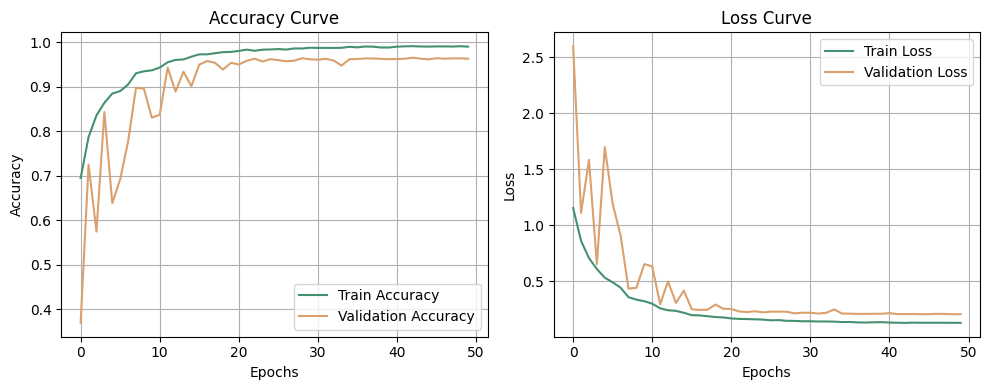

In [42]:
plot_training_curves(history)

169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9556 - loss: 0.2245
Test Accuracy: 0.9600
Test Loss: 0.2135
Precision: 0.9600
Recall: 0.9600
F1-score: 0.9599

Classification Report:
              precision    recall  f1-score   support

           0     0.9433    0.9433    0.9433       600
           1     0.9818    0.9917    0.9867       600
           2     0.9345    0.9267    0.9305       600
           3     0.9549    0.9320    0.9433       500
           4     0.9644    0.9760    0.9702       500
           5     0.9438    0.9650    0.9543       400
           6     0.9253    0.9420    0.9336       500
           7     0.9917    0.9900    0.9908       600
           8     0.9688    0.9320    0.9501       500
           9     0.9819    0.9933    0.9876       600

    accuracy                         0.9600      5400
   macro avg     0.9590    0.9592    0.9590      5400
weighted avg     0.9600    0.9600    0.9599      5400



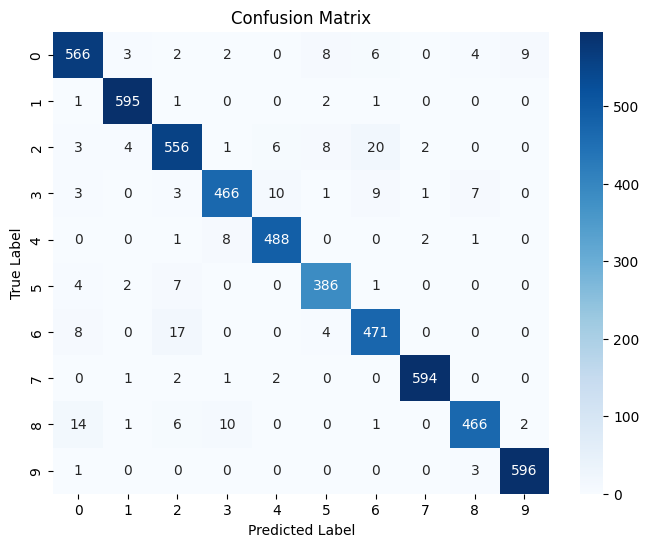

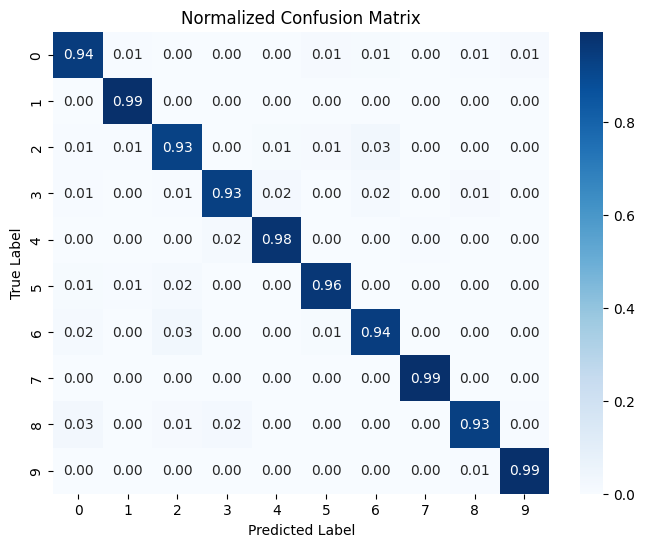

In [43]:
evaluate_model(model, test_generator)

<td style="border: 1px solid white; padding: 12px;">&nbsp;</td>

<div style="text-align: left; padding: 20px;">
    <span style="color: #9D7C5D; font-size: 25px; font-weight: bold;">Best Model
</span>
</div>

In [47]:
#CNN model with focal loss & class weights

#Compute class weights
class_labels = train_generator.classes
class_weights = compute_class_weight('balanced', classes=np.unique(class_labels), y=class_labels)
class_weight_dict = dict(enumerate(class_weights))


#Model architecture
model = Sequential([

    #Convolutional & pooling Layer 1
    Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001), input_shape=(64,64,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    #Convolutional & pooling Layer 2
    Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    #Convolutional & pooling Layer 3
    Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    #Convolutional & pooling Layer 4
    Conv2D(512, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    #Global Average Pooling layer instead of flatten
    GlobalAveragePooling2D(),

    #Fully connected layer
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.4),

    #Output layer
    Dense(10, activation='softmax')
])


#Model compilation
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=CategoricalFocalCrossentropy(gamma=2.0),
              metrics=['accuracy'])


#Callbacks to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)


#Model training on class weights
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    class_weight=class_weight_dict,
    callbacks=[early_stopping, lr_reduction]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


591/591 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.6027 - loss: 1.1075 - val_accuracy: 0.3867 - val_loss: 1.1833 - learning_rate: 1.0000e-04
Epoch 2/50
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.7548 - loss: 0.8752 - val_accuracy: 0.7704 - val_loss: 0.7753 - learning_rate: 1.0000e-04
Epoch 3/50
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8034 - loss: 0.7304 - val_accuracy: 0.8189 - val_loss: 0.6346 - learning_rate: 1.0000e-04
Epoch 4/50
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8339 - loss: 0.6034 - val_accuracy: 0.8252 - val_loss: 0.5283 - learning_rate: 1.0000e-04
Epoch 5/50
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8650 - loss: 0.4933 - val_accuracy: 0.8259 - val_loss: 0.4535 - learning_rate: 1.0000e-04
Epoch 6/50
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8673 - loss: 0.4099 - val_accuracy: 0.8359 - val_loss: 0.3715 - learning_rate: 1.0000e-04
Epoch 7/50
591/591 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8

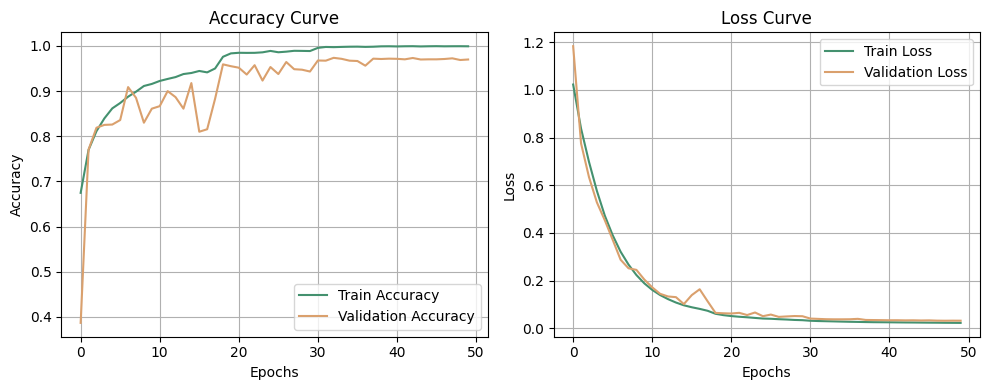

In [48]:
plot_training_curves(history)

169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9649 - loss: 0.0341
Test Accuracy: 0.9709
Test Loss: 0.0323
Precision: 0.9711
Recall: 0.9709
F1-score: 0.9709

Classification Report:
              precision    recall  f1-score   support

           0     0.9695    0.9533    0.9613       600
           1     0.9868    0.9933    0.9900       600
           2     0.9528    0.9417    0.9472       600
           3     0.9754    0.9520    0.9636       500
           4     0.9705    0.9860    0.9782       500
           5     0.9513    0.9775    0.9642       400
           6     0.9342    0.9660    0.9499       500
           7     0.9883    0.9883    0.9883       600
           8     0.9795    0.9540    0.9666       500
           9     0.9917    0.9950    0.9933       600

    accuracy                         0.9709      5400
   macro avg     0.9700    0.9707    0.9703      5400
weighted avg     0.9711    0.9709    0.9709      5400



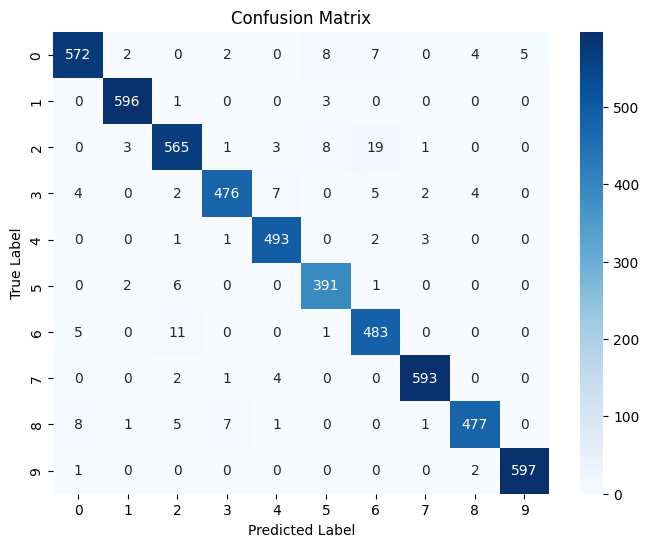

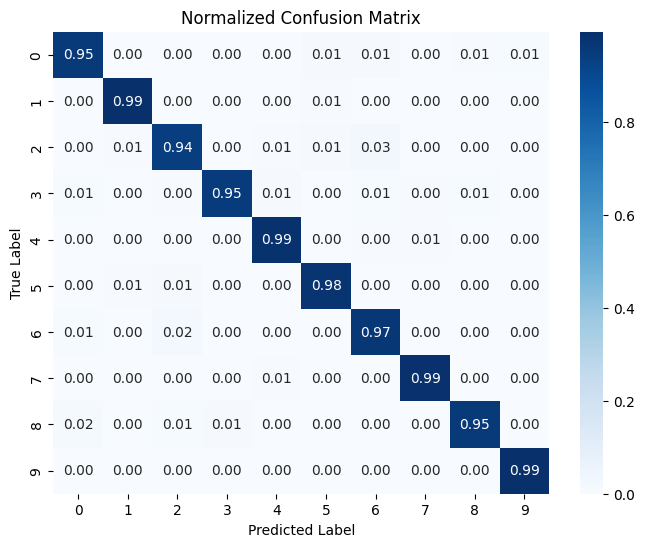

In [49]:
evaluate_model(model, test_generator)

In [50]:
#Save the best model
model.save('land_images_classifier.h5')

In [53]:
#Download the best model
shutil.move('land_images_classifier.h5', '/kaggle/working/land_images_classifier.h5')

'/kaggle/working/land_images_classifier.h5'

<td style="border: 1px solid white; padding: 12px;">&nbsp;</td>

<div style="text-align: left; padding: 20px;">
    <span style="color: #9D7C5D; font-size: 25px; font-weight: bold;">Pretrained Model
</span>
</div>

In [29]:
#EfficientNet-B3 model

#Defining directories
base_dir = "split_data"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")


#Data augmentation for training data only
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2]
)

#Validation/Test data without augmentation
val_test_datagen = ImageDataGenerator(rescale=1./255)


#Training data with resizing
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

#Validation data with resizing
val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

#Testing data with resizing
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


#Compute class weights to handle class imbalance
class_labels = train_generator.classes
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(class_labels), y=class_labels)
class_weight_dict = dict(enumerate(class_weights))


#EfficientNetB3 model loading
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(300, 300, 3))


#Freezing initial layers for transfer learning
for layer in base_model.layers[:150]:
    layer.trainable = False


#Adding custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(train_generator.num_classes, activation='softmax')(x)


#Creating the model
model = Model(inputs=base_model.input, outputs=output_layer)


#Initial model compilation
model.compile(optimizer=AdamW(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


#Callbacks to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)


#Initial model training (Transfer Learning)
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    class_weight=class_weight_dict,
    callbacks=[early_stopping, lr_reduction]
)


#Fine-tuning (Unfreezing all layers)
for layer in base_model.layers:
    layer.trainable = True


#Final model compilation
model.compile(optimizer=AdamW(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


#Final model training (Fine-tuning)
history_finetune = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    class_weight=class_weight_dict,
    callbacks=[early_stopping, lr_reduction]
)

Found 18900 images belonging to 10 classes.
Found 2700 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.
43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


591/591 ━━━━━━━━━━━━━━━━━━━━ 555s 797ms/step - accuracy: 0.2974 - loss: 1.8785 - val_accuracy: 0.4937 - val_loss: 1.4424 - learning_rate: 5.0000e-04
Epoch 2/30
591/591 ━━━━━━━━━━━━━━━━━━━━ 424s 710ms/step - accuracy: 0.5812 - loss: 1.1992 - val_accuracy: 0.5819 - val_loss: 1.2896 - learning_rate: 5.0000e-04
Epoch 3/30
591/591 ━━━━━━━━━━━━━━━━━━━━ 427s 715ms/step - accuracy: 0.6619 - loss: 0.9919 - val_accuracy: 0.6915 - val_loss: 0.9026 - learning_rate: 5.0000e-04
Epoch 4/30
591/591 ━━━━━━━━━━━━━━━━━━━━ 423s 707ms/step - accuracy: 0.6981 - loss: 0.8744 - val_accuracy: 0.7444 - val_loss: 0.6878 - learning_rate: 5.0000e-04
Epoch 5/30
591/591 ━━━━━━━━━━━━━━━━━━━━ 424s 709ms/step - accuracy: 0.7304 - loss: 0.7816 - val_accuracy: 0.6185 - val_loss: 1.2197 - learning_rate: 5.0000e-04
Epoch 6/30
591/591 ━━━━━━━━━━━━━━━━━━━━ 422s 706ms/step - accuracy: 0.7443 - loss: 0.7346 - val_accuracy: 0.8130 - val_loss: 0.5588 - learning_rate: 5.0000e-04
Epoch 7/30
591/591 ━━━━━━━━━━━━━━━━━━━━ 425s 711ms/

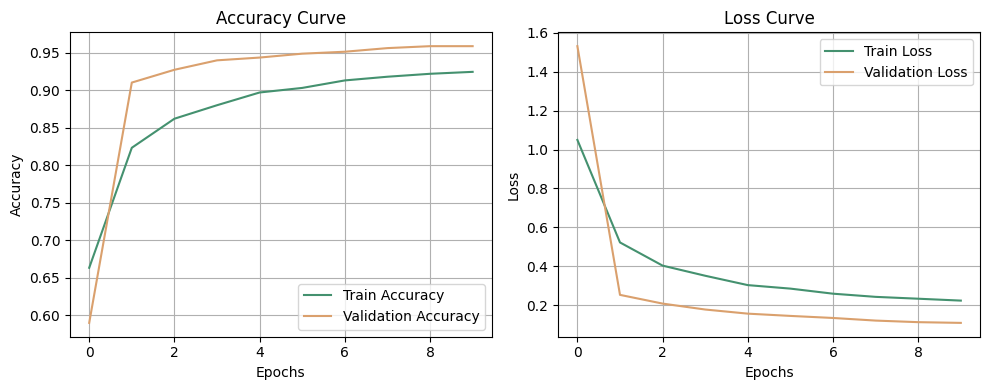

In [30]:
plot_training_curves(history_finetune)

169/169 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 0.9488 - loss: 0.1559
Test Accuracy: 0.9578
Test Loss: 0.1255
Precision: 0.9578
Recall: 0.9578
F1-score: 0.9577

Classification Report:
              precision    recall  f1-score   support

           0     0.9608    0.9383    0.9494       600
           1     0.9818    0.9867    0.9842       600
           2     0.9220    0.9067    0.9143       600
           3     0.9595    0.9480    0.9537       500
           4     0.9666    0.9840    0.9752       500
           5     0.9300    0.9625    0.9459       400
           6     0.9046    0.9100    0.9073       500
           7     0.9868    0.9950    0.9909       600
           8     0.9641    0.9660    0.9650       500
           9     0.9866    0.9783    0.9824       600

    accuracy                         0.9578      5400
   macro avg     0.9563    0.9576    0.9568      5400
weighted avg     0.9578    0.9578    0.9577      5400



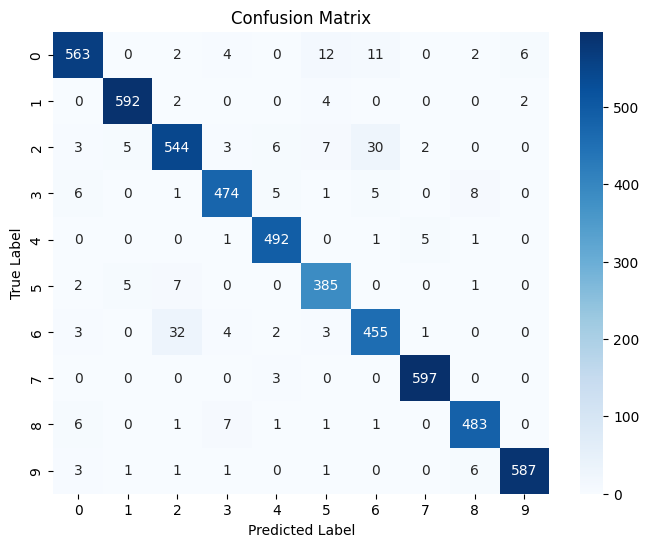

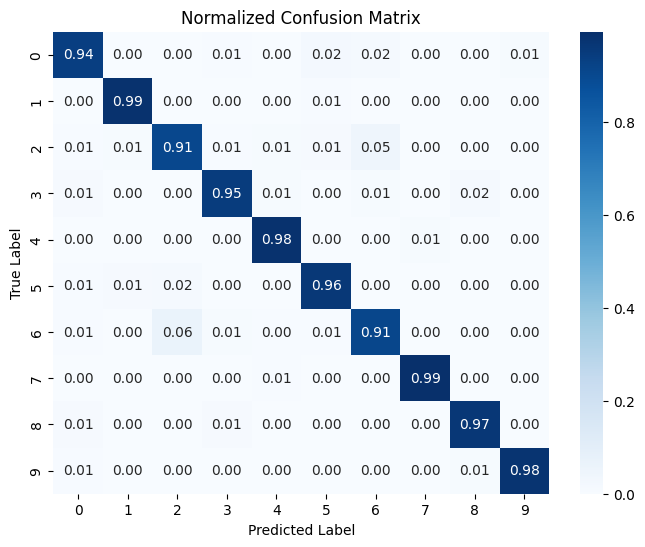

In [33]:
evaluate_model(model, test_generator)

<td style="border: 1px solid white; padding: 12px;">&nbsp;</td>